In [1]:
#library imports
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Problem 1. Basic linear regression

We will implement basic linear regression with mean-squared error in two ways: an optimization based approach and the exact solution

1A : Generate a synthetic dataset of N = 100 examples with one-dimensional inputs and outputs.

We will assume the ground truth is given by y = w x + b + e, where e is a normally distributed random variable.

Text(0, 0.5, 'y')

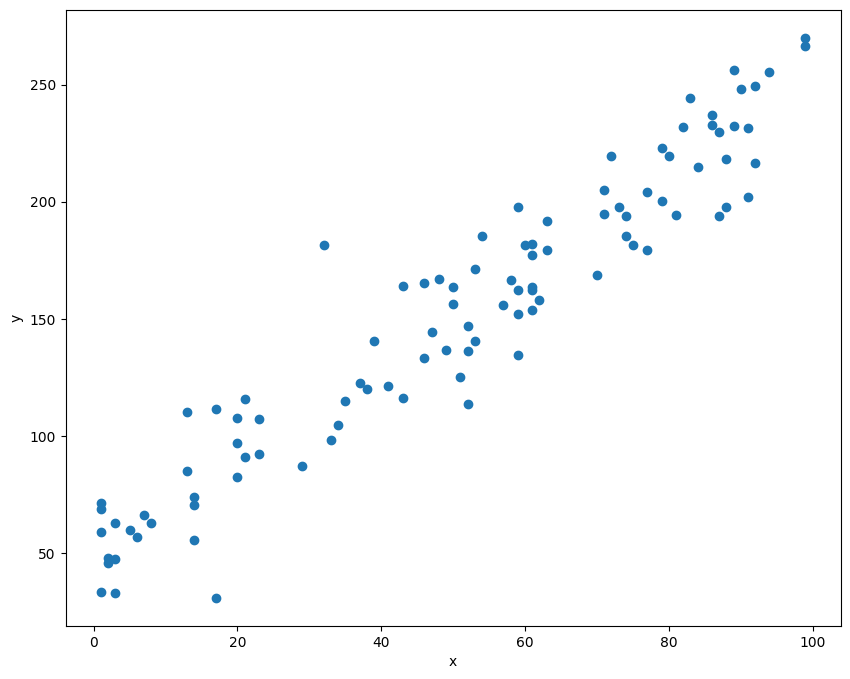

In [2]:
# The ground truth weight and bias:
W_star = 2.0
b_star = 50

#The standard deviation of the error
err_std = 20

# Now we will generate a dataset of N examples (X, Y)

N = 100 # Number of examples
x_range = 100 # Range of x values

np.random.seed(42) # Reproducibility

X = np.random.randint(x_range, size = (N, 1) )

e = np.random.normal(0, err_std, size = (N, 1) )

Y = X * W_star + b_star + e # y = Wx + b + error

# Plot our data points:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(X, Y)
ax.set_xlabel('x')
ax.set_ylabel('y')

1B: Now we will implement linear regression with mean squared error through gradient descent based optimization. Plot the resulting line obtained using optimization. What value of learning rates work, and which values diverge? What is the critical learning rate?

In [3]:
# Calculate mean and std of X and Y
meanX = np.mean(X)
meanY = np.mean(Y)
stdX = np.std(X)
stdY = np.std(Y)

# normalize the data using the mean and std calculated above
# We will be using the normalized X and Y for gradient descent
normX = (X - meanX) / stdX
normY = (Y - meanY) / stdY

In [4]:
normX.shape

(100, 1)

w: 1.043860610918658, b: 0.5264481613346957
Optimal value of w: 2.0000 and b: 49.9978


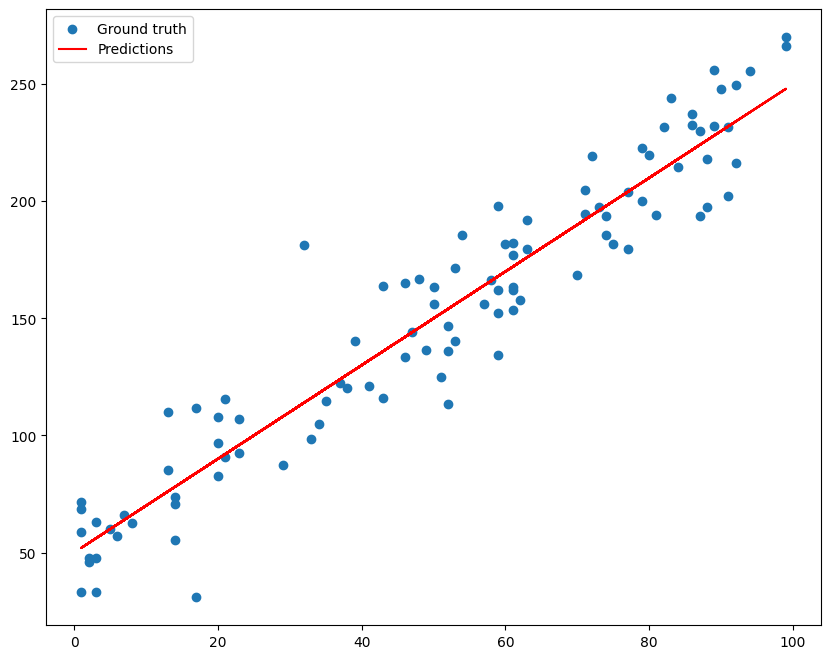

In [5]:
# We will be using MSE loss throughout the assignment
def mse_loss(y_hat, y):
    "MSE loss"
    return 0.5*np.mean((y_hat - y)**2)


# initialize w and b randomly:
w = np.random.normal(0, 1)
b = np.random.normal(0, 1)
print(f"w: {w}, b: {b}")

# Pick some learning rate to start
lr = 1e-03
# critical learning rate is 0.02 assuming the data is normalized

# Decide on number of iterations. Later on we will decide on an error
# threshold and train until the loss gets below the threshold.
num_iter = 10000

for n in range(num_iter):

    # Compute the loss
    loss_step = mse_loss(W_star*normX + b_star, normY)

    # Compute gradient of loss with respect to w and b:

    grad_w = np.mean(normX * (w*normX + b - W_star*normX - b_star))
    grad_b = np.mean(w*normX + b - W_star*normX - b_star)

    # update parameters
    w = w - lr * grad_w
    b = b - lr*grad_b

# Now we have our optimal solution for the normalized data.
# Unnormalize the predictions using the mean and std calculated before
Yhat = w * X + b

# Convert the optimal value of w and b to compare with W_star and b_star
opt_w = w
opt_b = b

################################# TO BE GRADED #################################
"Report the optimal values of w and b obtained above"
print(f'Optimal value of w: {opt_w:0.4f} and b: {opt_b:0.4f}')
################################################################################

################################# TO BE GRADED #################################
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
"Plot the best fit line obtained (using opt_w and opt_b) and compare it with the raw data"
ax.scatter(X, Y, label='Ground truth')
ax.plot(X, Yhat, color='red', label='Predictions')
ax.legend()
################################################################################

1C: Now we will implement linear regression using the exact solution. Plot the lines obtained from the exact solution and the one obtained by optimization together against the training data

In [7]:
################################# TO BE GRADED #################################
"Report the test loss obtained using the exact solution"
# Use the unnormalized data X, Y

X_tilde = np.array([X.reshape(len(X)), np.array([1]*N)]).T # shape: (N, d_in+1)

YT = Y.T
XT = X_tilde.T

Y_exact = (YT @ XT.T @ np.linalg.inv(XT @ XT.T) @ XT).T

# Y_exact = X_tilde.T@np.linalg.inv(X_tilde@X_tilde.T+0.0001*np.identity(100))@X_tilde@Y.T


test_loss = mse_loss(Y_exact, Y)
print(f'Test loss: {test_loss:0.4f}')

Test loss: 171.9441


In [9]:
YT @ XT.T @ np.linalg.inv(XT @ XT.T)

array([[ 2.02035674, 49.03730436]])

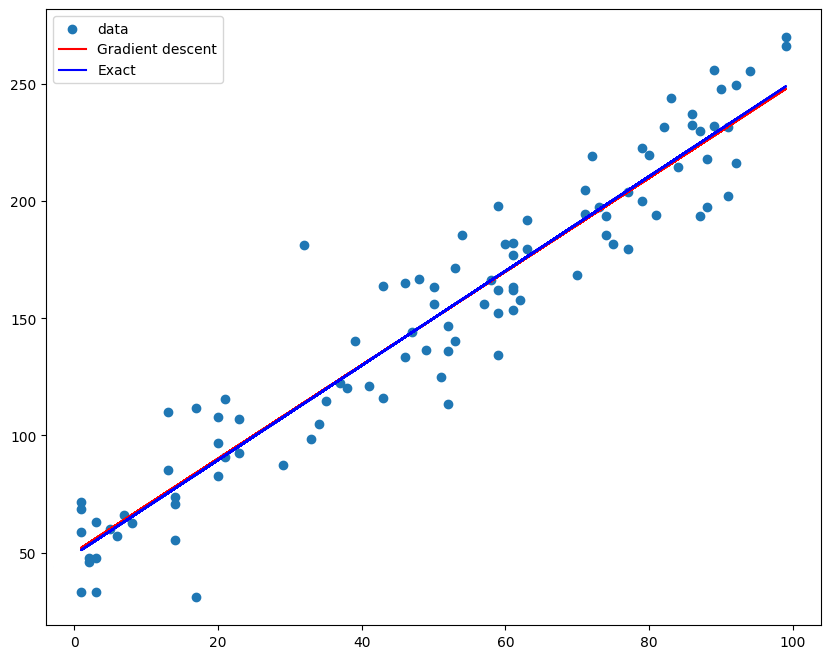

In [10]:
################################# TO BE GRADED #################################
" Plot the lines obtained from the exact solution and gradient descent togehter"

Wexact = YT@XT.T@np.linalg.inv(XT@XT.T)
Yexact = Wexact[0,0]*X + Wexact[0,1]

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(X, Y, label='data')
ax.plot(X, Yhat, color = 'red', label = 'Gradient descent')
ax.plot(X, Y_exact, color = 'Blue', label = 'Exact')
ax.legend()

1D: Compute the variance of the exact solution and draw the lines whose W is within a standard deviation of the exact solution

Variance matrix: [[ 4.09349800e-03 -2.06885389e-01]
 [-2.06885389e-01  1.39650503e+01]]


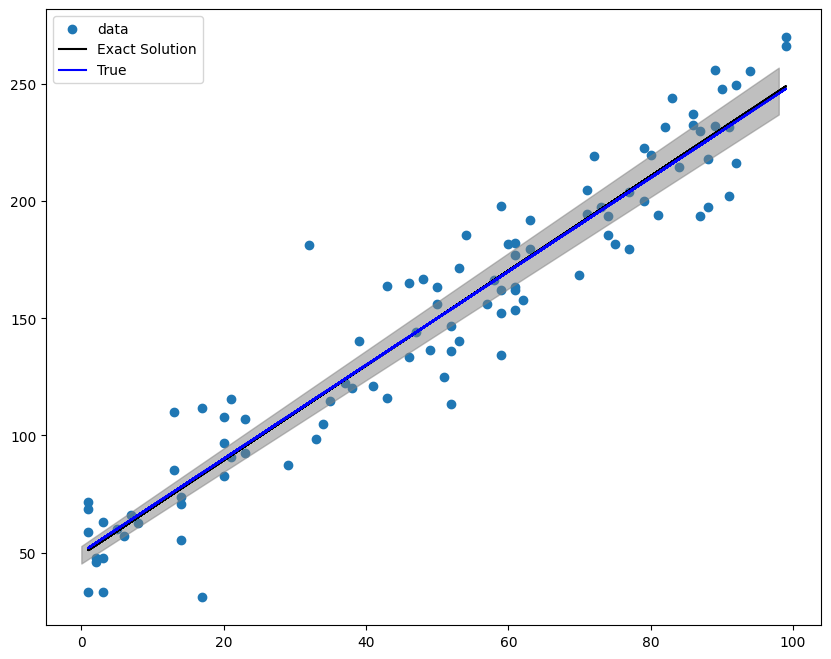

In [11]:
################################# TO BE GRADED #################################
var = np.linalg.inv(XT @ XT.T) * 1/(N-1-1) * np.sum((Y - Y_exact)**2)

print(f"Variance matrix: {var}")

Y_true = X * W_star + b_star

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(X, Y, label='data')
ax.plot(X, Yexact, color='Black', label='Exact Solution')
ax.plot(X, Y_true, color='Blue', label='True')

y_minus = (Wexact[0, 0] - np.sqrt(var[0, 0])) * \
    np.arange(np.max(X)) + (Wexact[0, 1] - np.sqrt(var[1, 1]))
y_plus = (Wexact[0, 0] + np.sqrt(var[0, 0])) * \
    np.arange(np.max(X)) + (Wexact[0, 1] + np.sqrt(var[1, 1]))

ax.fill_between(np.arange(np.max(X)), y_minus, y_plus, color='gray', alpha=0.5)
ax.legend()

1E: Now we will use sklearn's built-in linear regression function

In [12]:
#Use the unnormalized data X, Y
regressor = LinearRegression() #create an instance of linear regressor
fit = regressor.fit(X, Y)

################################# TO BE GRADED #################################
"Report the optimal values of weights and bias observed"
opt_w = fit.coef_[0,0]
opt_b = fit.intercept_[0]
print(f'Optimal W: {opt_w:0.4f}, Optimal b: {opt_b:0.4f}')

Optimal W: 2.0204, Optimal b: 49.0373


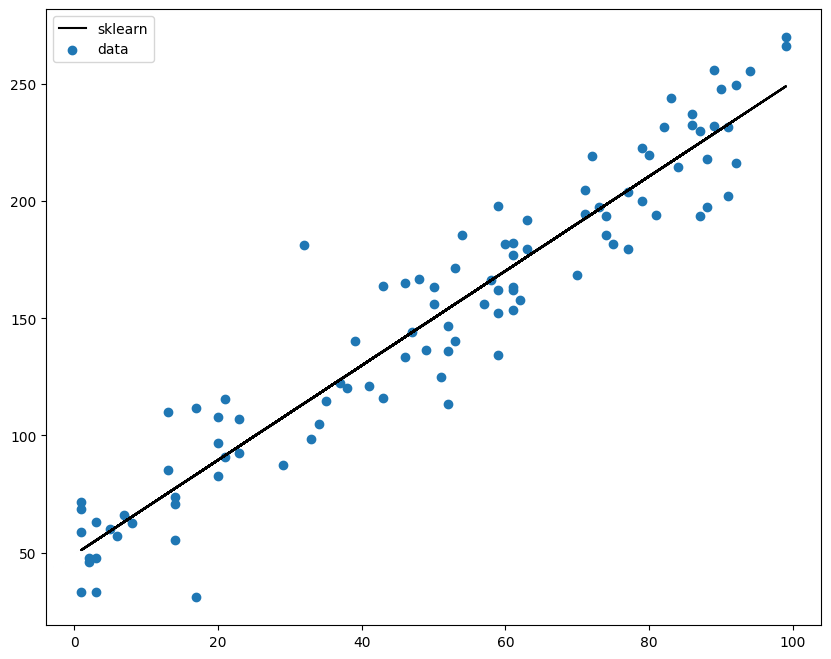

In [13]:
################################# TO BE GRADED #################################
" Plot the lines obtained from the sklearn regressor"
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

Y_sklearn = opt_w * X + opt_b

ax.plot(X, Y_sklearn, color='Black', label='sklearn')
ax.scatter(X, Y, label='data')
ax.legend()

# Data generation: Synthetic data and the house pricing dataset

We will generate two datasets that will be used in Problems 2, 3 and 4:


1.   Random synthetic dataset with input dimension $d_{in}$ and output dimension $d_o$
2.   House pricing dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [14]:
def generate_synthetic_dataset(W, b, N, stdev):
    """
    Description: Given W and b, generates a random dataset (X, Y) with N examples

    Inputs:
        W, b: Fixed matrices with shapes (d_o, d_in) and (d_o, 1)
        N: number of examples to generate

    Returns:
        X, Y: Inputs and outputs with shapes (N, d_in) and (N, d_o)
    """
    X, Y = None, None
    d_o, d_in = W.shape
    X = np.random.uniform(low = 0, high = 100, size = (N, d_in))
    eps = np.random.normal(loc = 0, scale = stdev, size = b.shape)
    Y = np.dot(X, W.T) + b.T + eps.T
    return X, Y

def normalize_dataset(X_train, Y_train, X_test, Y_test):
    """
    Description: Normalizes the dataset along batch/example axis (axis = 0) in this case.
        1. Compute the mean and std from the training dataset
        2. Normalize both training dataset using the mean and std calculated above; return the mean and std for later calculations

    Inputs:
        X_train = trianing inputs of shape (N, d_in)
        Y_train = training outputs of shape (N, d_o)

        X_test = trianing inputs of shape (M, d_in)
        Y_test = training outputs of shape (M, d_o)

        Here, M is the number of test examples


        axis: axis to compute stats; axis = 0 is the batch axis

    Returns:
        X_train_c, Y_train_c: normalized training dataset
        X_test_c, Y_test_c: normalized test dataset

    """
    # calculate the mean and the variance using the training dataset

    meanX = np.mean(X_train, axis = 0, keepdims = True)
    stdX = np.std(X_train, axis = 0, keepdims = True)

    meanY = np.mean(Y_train, axis = 0, keepdims = True)
    stdY = np.std(Y_train, axis = 0, keepdims = True)

    #normalize the training dataset

    X_train_c = (X_train - meanX) / stdX
    Y_train_c = (Y_train - meanY) / stdY

    X_test_c = (X_test - meanX) / stdX
    Y_test_c = (Y_test - meanY) / stdY

    return X_train_c, Y_train_c, X_test_c, Y_test_c

def preprocess_data(df):
    """Description: Preprocess the house process dataset
    (1) removes non-numeric columns
    (2) drops the ID column
    (3) removes all rows with nan in them
    """
    # Get all columns with numeric values
    df = df.select_dtypes(include=np.number)
    # remove the ID column and drop any column with nan
    df = df.drop(['Id'], axis = 1)
    df = df.dropna()
    return  df

### Synthetic dataset

**Task**: Create a synthetic dataset consisting of $N=100$ examples using the model $y = W^* x + b^* + ϵ$, where fixed $W^*, b^*$   and $ϵ$ is normally distributed as $ϵ \sim N(0, \sigma^2)$.


In [15]:
#Hyperparameters
d_in = 10 # input dimension
d_o = 1 # output dimension
N = 100 # number of examples to generate
sigma = 5 # stdev of eps

In [16]:
# Generate ground truth values W, b for the teacher-student model
np.random.seed(24)  # random seed for generating fixed W* and b*
W_star = np.random.normal(loc=0, scale=1, size=(d_o, d_in))
b_star = np.random.normal(loc=0, scale=1, size=(d_o, 1))

# Generate synthetic dataset using W, b
synth_X, synth_Y = generate_synthetic_dataset(
    W_star, b_star, N, sigma)  # Not normalized

# Split the dataset into trianing and test dataset
split_fraction = 0.8  # 80% training data; 20% test data
split = int(split_fraction*N)

synth_X_train, synth_X_test = synth_X[:split], synth_X[split:] # Not normalized
synth_Y_train, synth_Y_test = synth_Y[:split], synth_Y[split:] # Not normalized

synth_X_train_c, synth_Y_train_c, synth_X_test_c, synth_Y_test_c = normalize_dataset(
    synth_X_train, synth_Y_train, synth_X_test, synth_Y_test)

### House pricing dataset

In [17]:
#Helper functions
def _one_hot(x, k, dtype = np.float32):
  """Create a one-hot encoding of x of size k."""
  return np.array(x[:, None] == np.arange(k), dtype)

def _standardize(x):
  """Standardization the dataset along the batch size."""
  mean = np.mean(x, axis=0, keepdims=True)
  std_dev = np.std(x, axis=0, keepdims=True)
  return (x - mean) / std_dev



In [18]:
raw_data = pd.read_csv('../datasets/house_prices/train.csv', sep = ',')
dataset = preprocess_data(raw_data)
dataset.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Visualize the correlations between the features and outputs of the house pricing dataset.
The feature 'OverallQual' is well correlated with the sale price

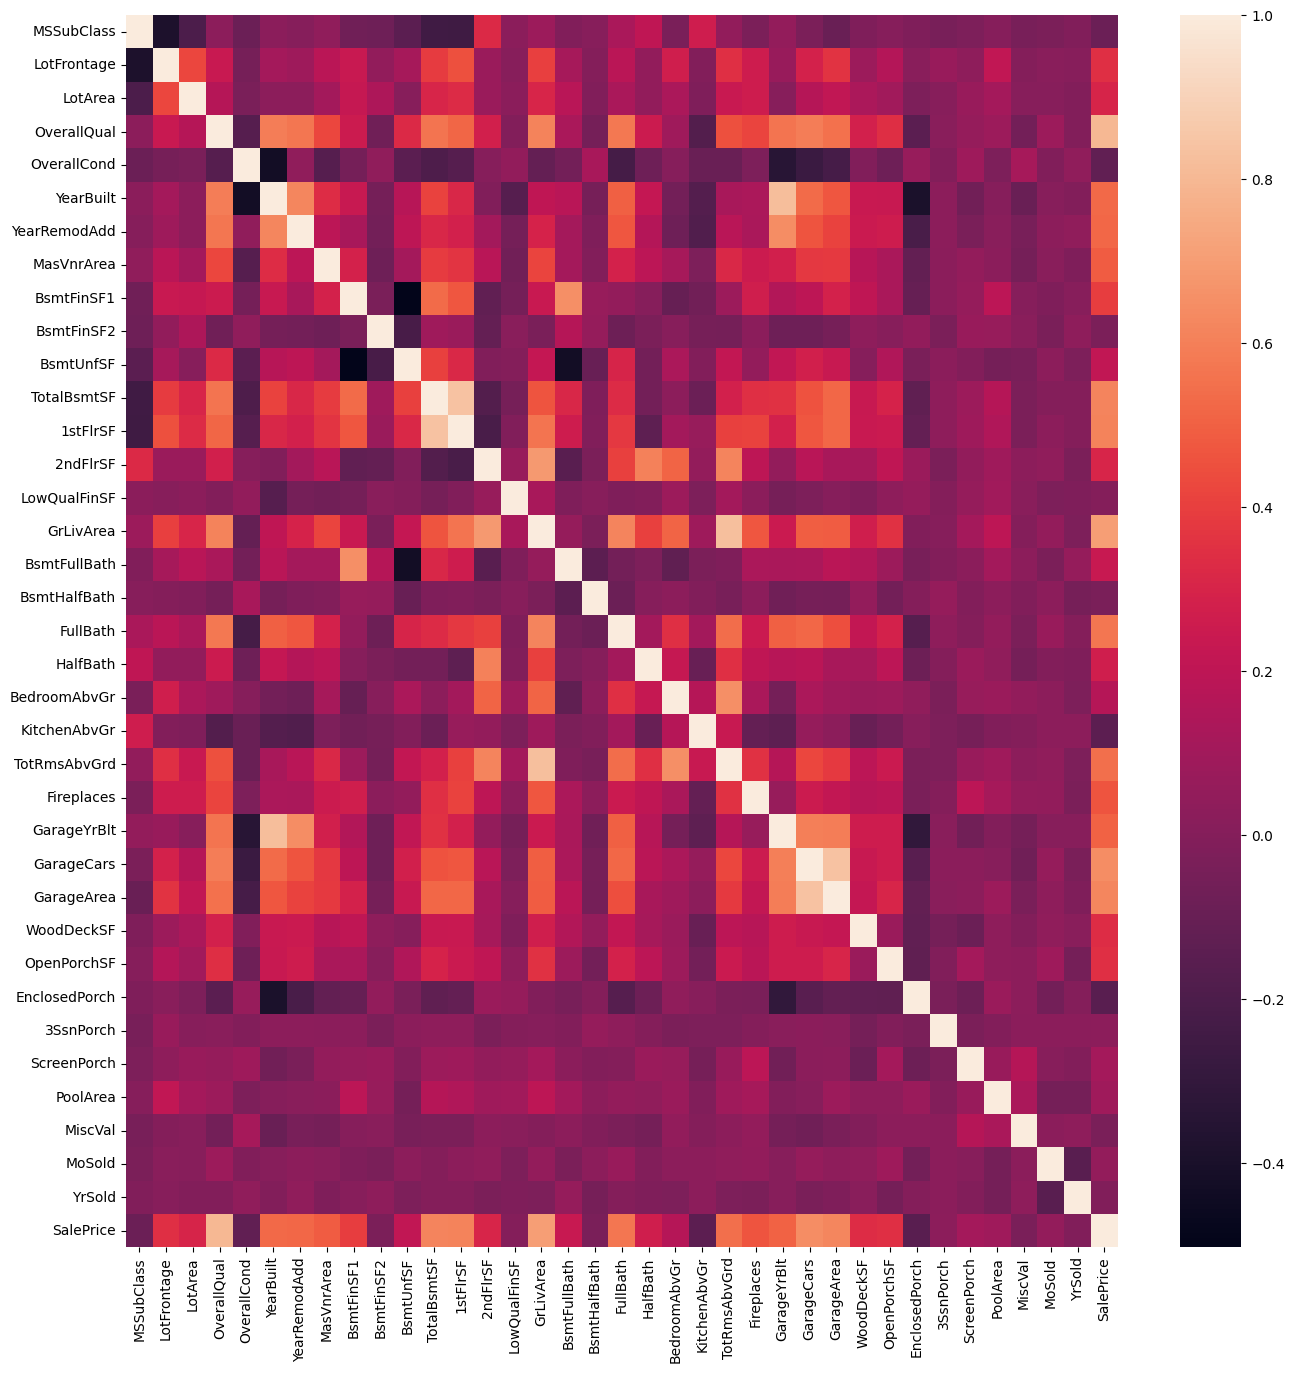

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (16, 16))
ax = sns.heatmap(dataset.corr())

Visualize the distribution of house sale prices


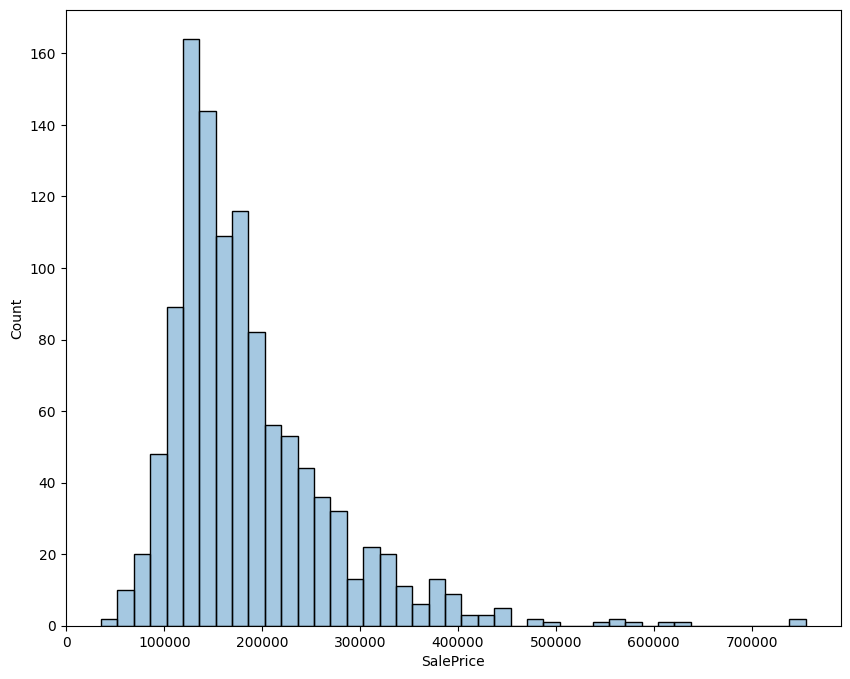

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.histplot(data = dataset, x = 'SalePrice', log_scale = False, kde = False, alpha = 0.4, label = 'Train')

Prepare the house price dataset: split the dataset into training and test; normalize the data

In [21]:
# Separate the inputs and outputs from the training dataset
N = len(dataset)

cols = list(dataset.columns)
cols.remove('SalePrice')  # We will guess SalePrice

# obtain numpy arrays from the pandas dataset
hp_X = pd.DataFrame(dataset, columns=cols).values
hp_Y = pd.DataFrame(dataset, columns=['SalePrice']).values


# Split the dataset into training and testing dataset into 80% and 20% for training and testing
split_fraction = 0.8
split = int(split_fraction*N)

hp_X_train, hp_X_test = hp_X[:split], hp_X[split:]  # Not normalized
hp_Y_train, hp_Y_test = hp_Y[:split], hp_Y[split:]  # Not normalized

hp_X_train_c, hp_Y_train_c, hp_X_test_c, hp_Y_test_c = normalize_dataset(
    hp_X_train, hp_Y_train, hp_X_test, hp_Y_test)

### Functions used for evaluations

In [22]:
############################# DO NOT MODIFY ####################################

def mse_loss(x, y):
    """
    Description: Estimate the MSE-loss of a given dataset

    Input:
        X: inputs of shape (examples, d_in)
        Y: inputs of shape (examples, d_out)
    Output:
        The averaged MSE loss
    """
    return 0.5*np.mean((x-y)**2)


def l2_norm(w):
    """
    Description: Computes the square l2-norm of the weights
    Input:
        W: weight matrix of shape
    Output:
        the square of the l2 norm of the matrix
    """
    return np.sum(w**2)

## Problem 2: Implement a linear regression function that uses gradient descent

Task: Perform linear regresion on both the synthetic and house pricing dataset generated above; use the normalized datasets and report the final test loss

### Vanilla gradient descent with MSE loss



In [23]:
# Optimization hyperparameters
# tune the hyperparameters

lr = 1e-02
thresh = 1e-03
max_iter = 1000

Plot the test loss against the training steps for both datasets

w_synth: [[ 1.47453181e+00 -2.94336928e-01  9.11041524e-01  7.42364154e-01
  -1.06129153e+00 -1.04130205e-03 -2.97120937e-01 -4.74955258e-01
   1.96145620e-01 -9.50703041e-01]], b_synth: [[-2.00420461]]
w_hp: [[ 0.77222682 -0.31888772 -0.51965119 -1.22957498 -0.65286638  1.13217507
  -1.15947414  0.93267148  0.68634284  2.3907606   0.01982956  0.42966846
  -1.93897021  0.33786139  0.89344443  1.18174984  1.36370285  0.09734675
   0.58148559 -1.2736432  -1.13290259  0.55643788  0.1257981   0.44547702
   0.60368123 -0.6202967  -2.18933123  0.90656076 -1.09664006  0.26437121
   0.8216998  -0.96055442 -0.80201879  0.0815743  -0.27886144  2.20810031]], b_hp: [[1.48827269]]


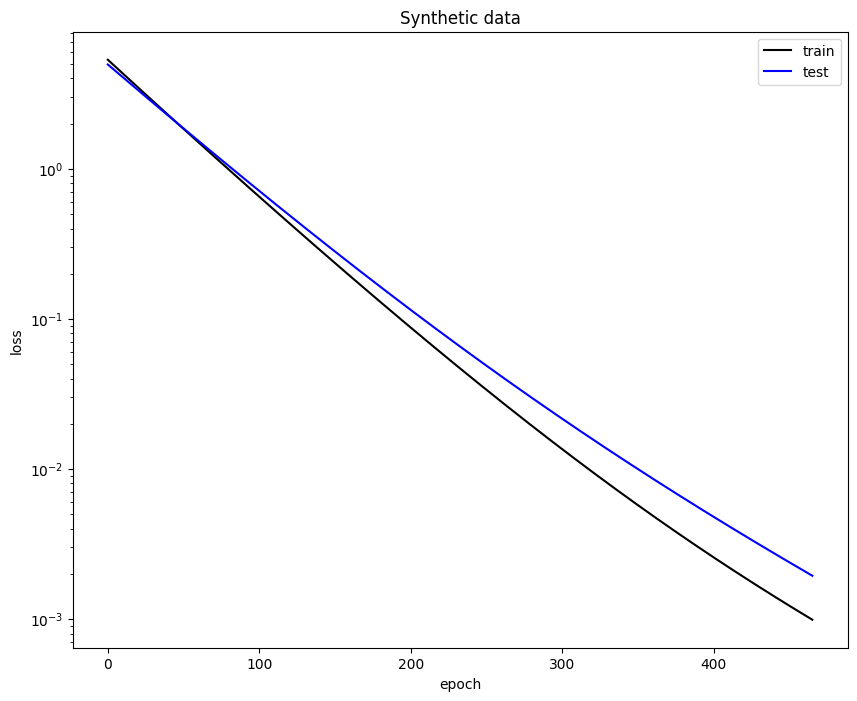

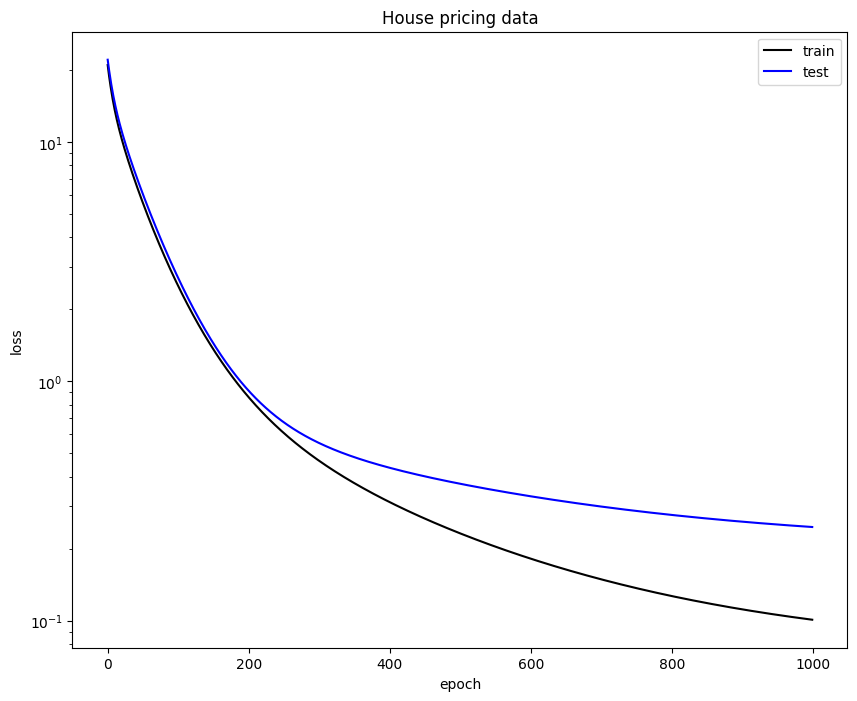

In [25]:
################################# TO BE GRADED #################################
"Plot the test loss against training steps for both datasets"


w_synth = np.random.normal(0, 1, (d_o, d_in))
b_synth = np.random.normal(0, 1, (d_o, 1))
print(f"w_synth: {w_synth}, b_synth: {b_synth}")

w_hp = np.random.normal(0, 1, (hp_Y_test_c.shape[1], hp_X_test_c.shape[1]))
b_hp = np.random.normal(0, 1, (hp_Y_test_c.shape[1], 1))
print(f"w_hp: {w_hp}, b_hp: {b_hp}")


def train(x, y, x_test, y_test, w, b, max_iter, lr, thresh):
    i = 0
    train_loss = 1e10
    train_losses = []
    test_losses = []

    while i < max_iter and train_loss > thresh:
        logits = x @ w.T + b
        train_loss = mse_loss(logits, y)

        # Gradient
        grad_w = ((logits - y) * x).mean(axis=0, keepdims=True)
        grad_b = (logits - y).mean(axis=0, keepdims=True)

        # Update
        w = w - lr * grad_w
        b = b - lr * grad_b

        logits_test = x_test @ w.T + b

        test_loss = mse_loss(logits_test, y_test)
        test_losses.append(test_loss)
        train_losses.append(train_loss)

        i += 1

    return np.array(train_losses), np.array(test_losses), w, b


hp_train_losses, hp_test_losses, hp_w, hp_b = train(
    hp_X_train_c, hp_Y_train_c, hp_X_test_c, hp_Y_test_c, w_hp, b_hp, max_iter=max_iter, lr=lr, thresh=thresh)

synth_train_losses, synth_test_losses, synth_w, synth_b = train(
    synth_X_train_c, synth_Y_train_c, synth_X_test_c, synth_Y_test_c, w_synth, b_synth, max_iter=max_iter, lr=lr, thresh=thresh)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(synth_train_losses, color='black', label='train')
ax.plot(synth_test_losses, color='blue', label='test')

ax.set_title('Synthetic data')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(hp_train_losses, color='black', label='train')
ax.plot(hp_test_losses, color='blue', label='test')

ax.set_title('House pricing data')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.legend()

In [27]:
w_hp.shape, hp_X_train_c.shape,  hp_Y_train_c.shape, synth_X.shape

((1, 36), (896, 36), (896, 1), (100, 10))

Report the Test loss on both datasets.
Use the function 'mse_loss' to report the results

In [28]:
################################# TO BE GRADED #################################


test_loss_synth = mse_loss(synth_X_test_c @ synth_w.T + synth_b, synth_Y_test_c)
test_loss_hp = mse_loss(hp_X_test_c @ hp_w.T + hp_b, hp_Y_test_c)

print(f'Test loss on the synthetic dataset {test_loss_synth:0.4f}')
print(f'Test loss on the house pricing dataset {test_loss_hp:0.4f}')

Test loss on the synthetic dataset 0.0019
Test loss on the house pricing dataset 0.2462


### Gradient descent with MSE loss + L2 regularization

Task: Same task as above but add L2 regularization to the task

In [29]:
#Optimization hyperparameters
# tune the hyperparameters
lr = 1e-02
thresh = 1e-03
max_iter = 1000
l2_strength = 1e-02 # the strength of l2 penalty

Plot the test loss against the training steps for both datasets

w_synth: [[-1.11582482  1.3776452  -0.06804293  0.57425327 -0.37853674  0.78374187
   2.98197965 -0.31687235 -2.41025315  0.33770121]], b_synth: [[-0.62451876]]
w_hp: [[ 0.54573974  0.40687221 -0.22637567  0.19334848  2.21458457  0.07221721
  -1.30495946  0.50384932 -0.42603319 -0.09677559 -0.95885483  1.32308311
   0.54089402 -1.10156783 -1.73574921  0.35698114 -0.42314865 -0.00896203
  -0.25797439 -1.265681    0.6621593  -0.25128199 -0.26296943  0.95345414
   0.82775284 -1.19331226  1.10621975  2.18871062 -0.80813437  0.70288081
   2.01403208 -1.92995278 -0.66624919 -0.16300637  0.15499421 -0.42185611]], b_hp: [[0.95110278]]


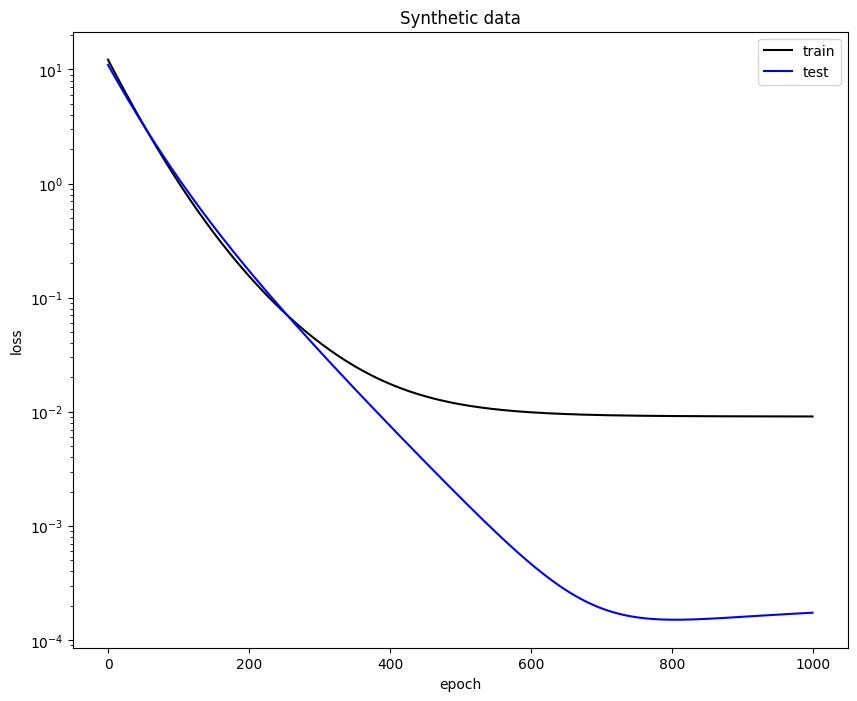

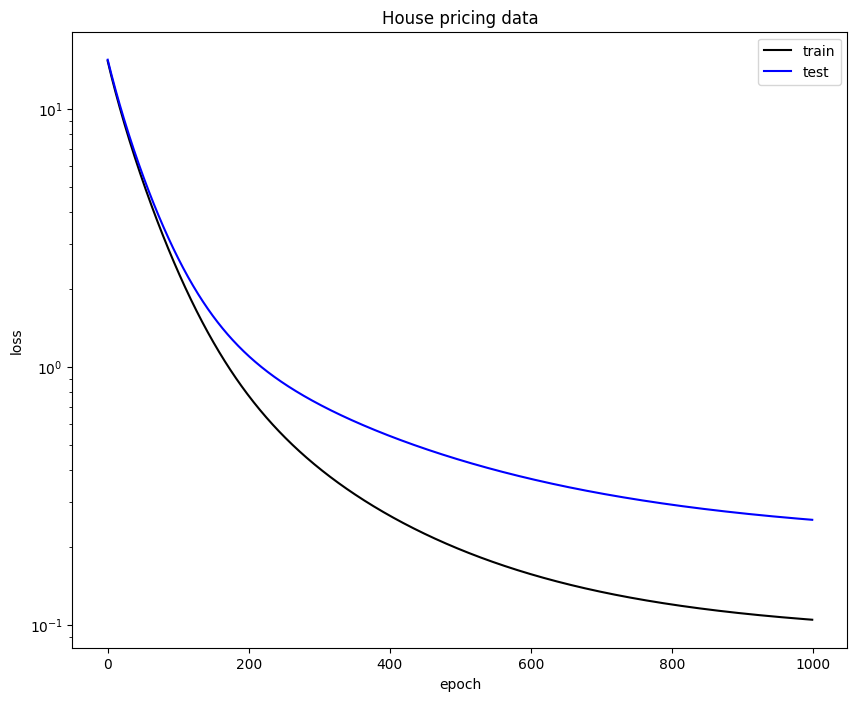

In [30]:
################################# TO BE GRADED #################################

w_synth = np.random.normal(0, 1, (d_o, d_in))
b_synth = np.random.normal(0, 1, (d_o, 1))
print(f"w_synth: {w_synth}, b_synth: {b_synth}")

w_hp = np.random.normal(0, 1, (hp_Y_test_c.shape[1], hp_X_test_c.shape[1]))
b_hp = np.random.normal(0, 1, (hp_Y_test_c.shape[1], 1))
print(f"w_hp: {w_hp}, b_hp: {b_hp}")


def train_l2(x, y, x_test, y_test, w, b, max_iter, lr, thresh, l2_strength):
    i = 0
    train_loss = 1e10
    train_losses = []
    test_losses = []

    while i < max_iter and train_loss > thresh:
        logits = x @ w.T + b
        train_loss = mse_loss(logits, y) + l2_strength * l2_norm(w)

        # Gradient
        grad_w = ((logits - y) * x).mean(axis=0,
                                         keepdims=True) + l2_strength * (2*w)
        grad_b = (logits - y).mean(axis=0, keepdims=True)

        # Update
        w = w - lr * grad_w
        b = b - lr * grad_b

        logits_test = x_test @ w.T + b

        test_loss = mse_loss(logits_test, y_test)
        test_losses.append(test_loss)
        train_losses.append(train_loss)

        i += 1

    return np.array(train_losses), np.array(test_losses), w, b


hp_train_losses, hp_test_losses, hp_w, hp_b = train_l2(
    hp_X_train_c, hp_Y_train_c, hp_X_test_c, hp_Y_test_c, w_hp, b_hp, max_iter=max_iter, lr=lr, thresh=thresh, l2_strength=l2_strength)

synth_train_losses, synth_test_losses, synth_w, synth_b = train_l2(
    synth_X_train_c, synth_Y_train_c, synth_X_test_c, synth_Y_test_c, w_synth, b_synth, max_iter=max_iter, lr=lr, thresh=thresh, l2_strength=l2_strength)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(synth_train_losses, color='black', label='train')
ax.plot(synth_test_losses, color='blue', label='test')

ax.set_title('Synthetic data')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(hp_train_losses, color='black', label='train')
ax.plot(hp_test_losses, color='blue', label='test')

ax.set_title('House pricing data')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.legend()

Report the Test loss on both datasets
Use the function 'mse_loss' and 'l2_norm' to report the results

In [31]:
################################# TO BE GRADED #################################


test_loss_synth = mse_loss(synth_X_test_c @ synth_w.T + synth_b, synth_Y_test_c) 
test_loss_hp = mse_loss(hp_X_test_c @ hp_w.T + hp_b, hp_Y_test_c) 

print(f'Test loss (with l2 regularization) on the synthetic dataset {test_loss_synth:0.4f}')
print(f'Test loss (with l2 regularization) on the house pricing dataset {test_loss_hp:0.4f}')

Test loss (with l2 regularization) on the synthetic dataset 0.0002
Test loss (with l2 regularization) on the house pricing dataset 0.2557


## Problem 3: Implement a linear regression function that uses the exact solution

Task: Perform linear regression on both synthetic and house pricing datasets

Use the function 'mse_loss' to report the training and test loss on both datasets

In [32]:
np.ones_like(synth_X_train_c[:, :1]).shape

(80, 1)

In [33]:
synth_w.shape, synth_X_train_c.shape, synth_Y_train_c.shape
hp_w.shape, hp_X_train_c.shape, hp_Y_train_c.shape

((1, 36), (896, 36), (896, 1))

In [ ]:
################################# TO BE GRADED #################################
def linear_regressor_exact(x, y, x_test, y_test):
    x_tilde = np.hstack((x, np.ones_like(x[:,:1]))) # shape: (N_train, d_in+1)
    x_test_tilde = np.hstack((x_test, np.ones_like(x_test[:, :1]))) # shape: (N_test, d_in+1)

    w_exact =  y.reshape(1,-1) @ x_tilde @ np.linalg.inv(x_tilde.T @ x_tilde) # shape: (d_in+1, d_in +1), need to use pseudo-inverse
    
    Y_exact = w_exact @ x_test_tilde.T # shape: (d_out, N_test)
    test_loss = mse_loss(Y_exact, y_test.T) # shape of y_test: (N_test, d_out)

    return test_loss, w_exact


test_loss_synth, _ = linear_regressor_exact(synth_X_train_c, synth_Y_train_c, synth_X_test_c, synth_Y_test_c)
test_loss_hp, _ = linear_regressor_exact(hp_X_train_c, hp_Y_train_c, hp_X_test_c, hp_Y_test_c)


print(f'Test loss on the synthetic dataset {test_loss_synth:0.4f}')
print(f'Test loss on the house pricing dataset {test_loss_hp:0.4f}')


Test loss on the synthetic dataset 0.0000
Test loss on the house pricing dataset 34.7873


## Problem 4: Use linear regression from sklearn

Task: Implement linear regression using sklearn. Calculate the MSE loss for the training and testing dataset.

In [35]:
regressor = LinearRegression() # create an instance of linear regressor

Use the function 'mse_loss' to report the training and test loss on both datasets

In [36]:
################################# TO BE GRADED #################################

regressor_synth = LinearRegression()
regressor_hp = LinearRegression()

regressor_synth.fit(synth_X_train_c, synth_Y_train_c)
regressor_hp.fit(hp_X_train_c, hp_Y_train_c)

synth_Y_pred = regressor_synth.predict(synth_X_test_c)
hp_Y_pred = regressor_hp.predict(hp_X_test_c)


test_loss_synth = mse_loss(synth_Y_pred, synth_Y_test_c)
test_loss_hp = mse_loss(hp_Y_pred, hp_Y_test_c)

print(f'Test loss on the synthetic dataset {test_loss_synth:0.4f}')
print(f'Test loss on the house pricing dataset {test_loss_hp:0.4f}')

Test loss on the synthetic dataset 0.0000
Test loss on the house pricing dataset 0.2093


# Problem 5:  Locally linear regression

See, Section 1.3 Linear regression 2 notes.

Task: Use locally linear regression to find solutions to a non-linear problem.

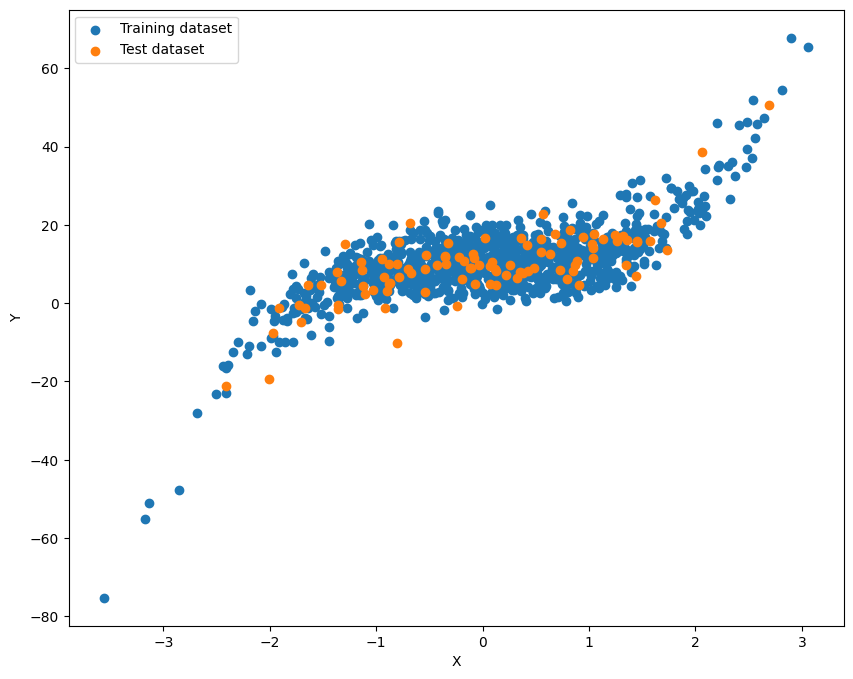

In [ ]:
"Generate datset with a cubic relationship between X and Y"
N = 1000  # number of training examples
M = 100  # number of test examples
np.random.seed(8)

# Generate training dataset
cubic_X_train = np.random.randn(N, 1)
cubic_Y_train = 2*(cubic_X_train**3) + 10 + 5*np.random.randn(N, 1)

# Generate test dataset
cubic_X_test = np.random.randn(M, 1)
cubic_Y_test = 2*(cubic_X_test**3) + 10 + 5*np.random.randn(M, 1)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(cubic_X_train, cubic_Y_train, label='Training dataset')
ax.scatter(cubic_X_test, cubic_Y_test, label='Test dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

### Gradient descent based

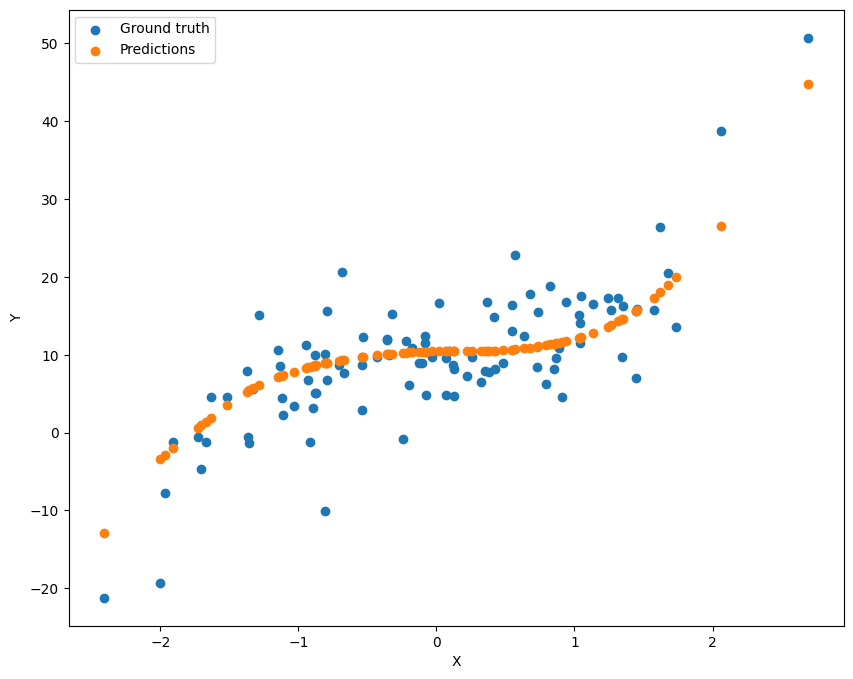

In [38]:
"Using the locally linear regression to predict the test data points; plot it against the ground truth values of the test dataset for comparison"
################################# TO BE GRADED #################################

###### Gaussian kernel
def k(x, xi, lamda): # xi: training set, cubic_X_train
    return np.exp(-0.5/lamda*(x-xi)**2)

def kernel_loss(x, xi, y, lamda, w, b):
    ks = k(x, xi, lamda)
    return np.sum(ks*(w*x+b - y)**2)
    return ks
    return ks (w*x+b - y)**2

num_iter = 200 # number of trainings
epsilon = 1e-6 # for numerical derivative
lr=1e-3
lamda = 0.05 # bandwidth for kernel

def LLR(x, n, lr, ep):
    np.random.seed(0) # Fix random seeed
    w = np.random.normal(0, 1)
    b = np.random.normal(0, 1)
    for n in range(n):
        # Compute gradient of loss with respect to w and b:
        grad_w = (kernel_loss(x, cubic_X_train, cubic_Y_train, lamda, w+ep, b) - kernel_loss(x, cubic_X_train, cubic_Y_train, lamda, w-ep, b))/(2*ep)
        grad_b = (kernel_loss(x, cubic_X_train, cubic_Y_train, lamda, w, b+ep) - kernel_loss(x, cubic_X_train, cubic_Y_train, lamda, w, b-ep))/(2*ep)

        # update parameters
        w = w - lr*grad_w
        b = b - lr*grad_b

    return w*x + b

cubic_Y_test_preds = np.array(list(map(lambda x: LLR(x, num_iter, lr, epsilon), cubic_X_test)))

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(cubic_X_test, cubic_Y_test, label = 'Ground truth')
ax.scatter(cubic_X_test, cubic_Y_test_preds, label = 'Predictions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

### solve equation

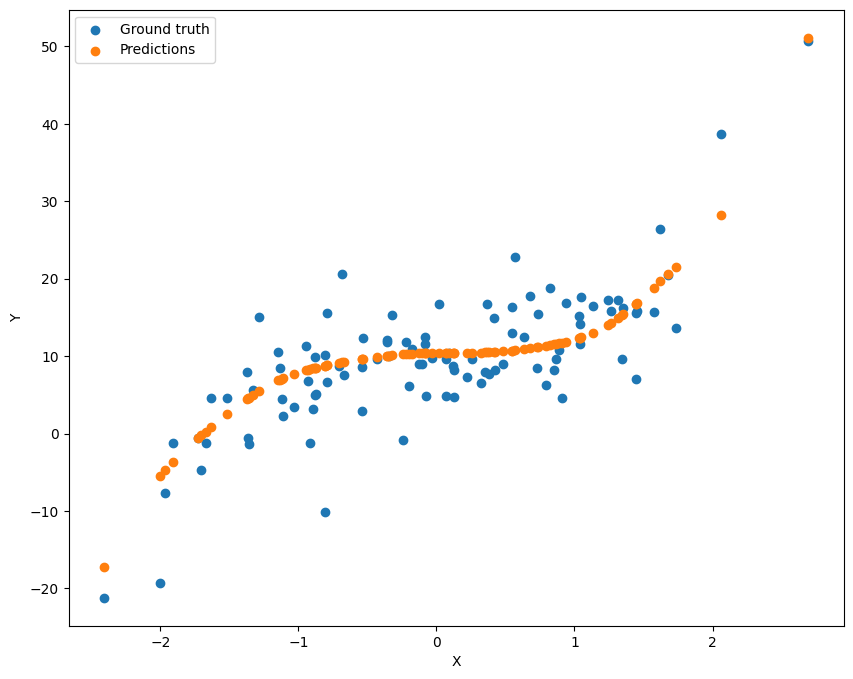

In [ ]:
###### Gaussian kernel
def k(x, xi, lamda):
    return np.exp(-0.5 / lamda * (x - xi)**2)

def predict_fn_LLR(x_test, x_train, y_train, lamda=0.05):
    preds = []

    # Design matrix (with bias term, i.e., augmented X matrix)
    X_augmented = np.hstack([x_train[:, :], np.ones_like(x_train[:, :1])])
    
    for x0 in x_test:
        # Calculate the kernel weights for each training point
        K = np.array([k(x0, xi, lamda) for xi in x_train])
        K = np.diag(K.flatten())
    
        # Compute the normal equation for locally linear regression
        XTKX = X_augmented.T @ K @ X_augmented
        XTKy = X_augmented.T @ K @ y_train

        # Solve for the parameters
        W = np.linalg.inv(XTKX) @ XTKy

        # Ensure beta is a 2D array and expand x0 to match the augmented input shape
        x0_augmented = np.hstack([x0, np.ones_like(x0)])  # (x0, 1) is the augmented input vector

        # Make prediction for x0 using the learned parameters (beta)
        pred = np.dot(x0_augmented, W)  # This should be a valid dot product
        preds.append(pred)


    return np.array(preds)

# Make predictions using LLR
cubic_Y_test_preds_exact = predict_fn_LLR(cubic_X_test, cubic_X_train, cubic_Y_train, lamda=0.05)

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(cubic_X_test, cubic_Y_test, label='Ground truth')
ax.scatter(cubic_X_test, cubic_Y_test_preds_exact, label='Predictions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


In [40]:
np.hstack([cubic_X_test[0], np.ones_like(cubic_X_test[0])])

array([0.02078144, 1.        ])

In [41]:
np.allclose(np.hstack([cubic_X_train[:, :], np.ones_like(cubic_X_train[:, :1])]) , np.vstack([cubic_X_train.T, np.ones_like(cubic_X_train.T)]).T)

True

Report mean square error on the test dataset

In [42]:
################################# TO BE GRADED #################################

test_loss_cubic = mse_loss(cubic_Y_test, cubic_Y_test_preds)
test_loss_cubic_exact = mse_loss(cubic_Y_test, cubic_Y_test_preds_exact)

print(f'Test loss on the cubic dataset GD: {test_loss_cubic:0.4f}, exact: {test_loss_cubic_exact:0.4f}')

Test loss on the cubic dataset GD: 13.6733, exact: 12.6891


# Bonus problem: Build a single-layer neural network using Pytorch

Layout:

1.   Use torch.nn to write down a Pytorch module for linear regression
2.   Use torch.nn to specify loss, torch.optim to specify optimizer
3.   Write a training loop using the following functionalities: optimizer.zero_grad(), loss.backward(), optimizer.step() (in this order)
4.   Evaluate the model in torch.no_grad() mode





In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

Linear(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)
fc1.weight tensor([[-0.0075]])
fc1.bias tensor([0.5364])
Epoch 1, Loss: 18283.89453125
Epoch 51, Loss: 1388.7376708984375
Epoch 101, Loss: 588.0281372070312
Epoch 151, Loss: 1365.517333984375
Epoch 201, Loss: 1109.286376953125
Epoch 251, Loss: 1634.4947509765625
Epoch 301, Loss: 1222.9921875
Epoch 351, Loss: 558.3079833984375
Epoch 401, Loss: 652.0466918945312
Epoch 451, Loss: 1046.6484375
Epoch 501, Loss: 572.1074829101562
Epoch 551, Loss: 877.4610595703125
Epoch 601, Loss: 750.8654174804688
Epoch 651, Loss: 348.2063293457031
Epoch 701, Loss: 532.8197021484375
Epoch 751, Loss: 714.1788330078125
Epoch 801, Loss: 172.80447387695312
Epoch 851, Loss: 773.5769653320312
Epoch 901, Loss: 319.1221923828125
Epoch 951, Loss: 377.18243408203125
fc1.weight tensor([[2.0551]])
fc1.bias tensor([48.6891])


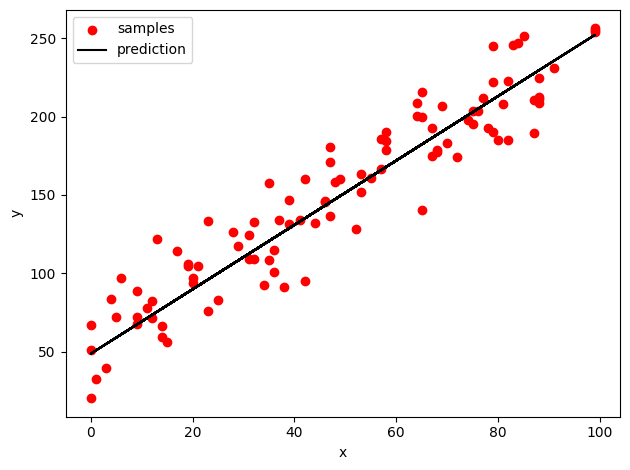

In [ ]:
torch.manual_seed(0)
np.random.seed(0)


class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)


model = Linear()
criterion = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=1e-2)

print(model)

for name, param in model.named_parameters():
    print(name, param.data)


# The ground truth weight and bias:
W_star = 2.0
b_star = 50

# The standard deviation of the error
err_std = 20

# Now we will generate a dataset of N examples (X, Y)
N = 100  # Number of examples
x_range = 100  # Range of x values

data_x = torch.tensor(np.random.randint(
    x_range, size=(N, 1)), dtype=torch.float32)
data_er = torch.tensor(np.random.normal(
    0, err_std, size=(N, 1)), dtype=torch.float32)
data_y = data_x * W_star + b_star + data_er  # y = Wx + b + error

# Create dataset and dataloader
dataset = TensorDataset(data_x, data_y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Training loop
epochs = 1000
for epoch in range(epochs):
    for data in dataloader:
        inputs, targets = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        opt.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

for name, param in model.named_parameters():
    print(name, param.data)

with torch.no_grad():
    predictions = model(data_x)


plt.scatter(data_x, data_y, label="samples", color='red')
plt.plot(data_x,  predictions, label='prediction', color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()